<a href="https://colab.research.google.com/github/Mehaksaini2808/Satellite-Segmentation-on-Aerial-Imagery/blob/main/Semantic_segmentation_of_aerial_imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [ ]:
!pip install patchify


In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

## Preparing Dataset

In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
dataset_root_folder = '/content/drive/MyDrive/dubaidataset'

In [ ]:
dataset_name = 'dubaidataset'

In [ ]:
print("Contents of the dataset:")
for root, dirs, files in os.walk(dataset_root_folder):
    # Print directories
    for directory in dirs:
        print(os.path.join(root, directory))
    # Print files
    for file in files:
        print(os.path.join(root, file))

Contents of the dataset:
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 7
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 3
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 8
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 1
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 6
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 5
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 2
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 4
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/classes.json
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 7/images
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 7/masks
/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 7/images/image_p

In [ ]:
!ls -lah '/content/drive/MyDrive/dubaidataset'

total 4.0K
drwx------ 10 root root 4.0K Apr 22 05:31 'Semantic segmentation dataset'


In [ ]:
for path, subdirs, files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images': #use mask as well
    images = os.listdir(path)
   #print(path)
    print (images)
 #   for i, image_name in enumerate(images):
 #     if(image_name.endswith('.jpg')): #you cane use .png
 #       print(images)


['image_part_002.jpg', 'image_part_006.jpg', 'image_part_009.jpg', 'image_part_005.jpg', 'image_part_008.jpg', 'image_part_001.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_007.jpg']
['image_part_006.jpg', 'image_part_001.jpg', 'image_part_009.jpg', 'image_part_008.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_002.jpg', 'image_part_007.jpg', 'image_part_005.jpg']
['image_part_003.jpg', 'image_part_002.jpg', 'image_part_001.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_006.jpg', 'image_part_009.jpg']
['image_part_002.jpg', 'image_part_005.jpg', 'image_part_007.jpg', 'image_part_009.jpg', 'image_part_008.jpg', 'image_part_001.jpg', 'image_part_004.jpg', 'image_part_003.jpg', 'image_part_006.jpg']
['image_part_002.jpg', 'image_part_003.jpg', 'image_part_009.jpg', 'image_part_006.jpg', 'image_part_008.jpg', 'image_part_004.jpg', 'image_part_001.jpg', 'image_part_005.jpg', 'image_part_007.jpg']
['ima

In [ ]:
image_path= cv2.imread('/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg')

In [ ]:
print(image_path)

[[[201 195 190]
  [225 219 214]
  [241 232 228]
  ...
  [255 236 231]
  [254 234 229]
  [255 239 234]]

 [[226 220 215]
  [254 248 243]
  [255 255 251]
  ...
  [252 231 229]
  [247 228 223]
  [242 223 218]]

 [[248 241 238]
  [255 252 249]
  [255 255 251]
  ...
  [253 234 231]
  [252 235 232]
  [245 228 225]]

 ...

 [[211 200 203]
  [220 209 212]
  [221 211 217]
  ...
  [220 229 242]
  [234 243 255]
  [235 244 255]]

 [[209 198 201]
  [219 208 211]
  [220 210 216]
  ...
  [213 222 235]
  [222 231 244]
  [218 227 240]]

 [[213 202 205]
  [210 199 202]
  [201 191 197]
  ...
  [223 232 245]
  [233 242 255]
  [230 239 252]]]


In [ ]:
image_path.shape

(644, 797, 3)

In [ ]:
#image_dataset =[]
#image_extension = '.jpg'
#for tile_id in range(1,8):
#  for image_id in range(1,20):
#    image = cv2.imread(f'/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile {tile_id}/images/image_part_00{image_id}{image_extension}')
#    if image is not None:
#      print(image.shape)

In [ ]:
#image shape must be multiple of patch size
image_patch_size = 256

In [ ]:
image_path.shape

(644, 797, 3)

In [ ]:
image1_patches =patchify(image_path, (image_patch_size, image_patch_size,3), step = image_patch_size)

In [ ]:
len(image1_patches)

2

In [ ]:
temp =image1_patches[0,0,:,:].shape
#minmaxscalar
temp = np.array(image1_patches[0,0,:,:])

# MinMaxScaler
minmaxscalar = MinMaxScaler()

# Reshape temp_np and fit_transform
image_y=minmaxscalar.fit_transform(temp.reshape(-1, temp.shape[-1])).reshape(temp.shape)


In [ ]:
image_y[0].shape

(256, 256, 3)

In [ ]:
print(image1_patches.shape)

(2, 3, 1, 256, 256, 3)


In [ ]:
print(type(image_path))

<class 'numpy.ndarray'>


In [ ]:
type(Image.fromarray(image_path))

PIL.Image.Image

In [ ]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'/content/drive/MyDrive/dubaidataset/Semantic segmentation dataset/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        # make sure images is in order RGB not in BGR
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


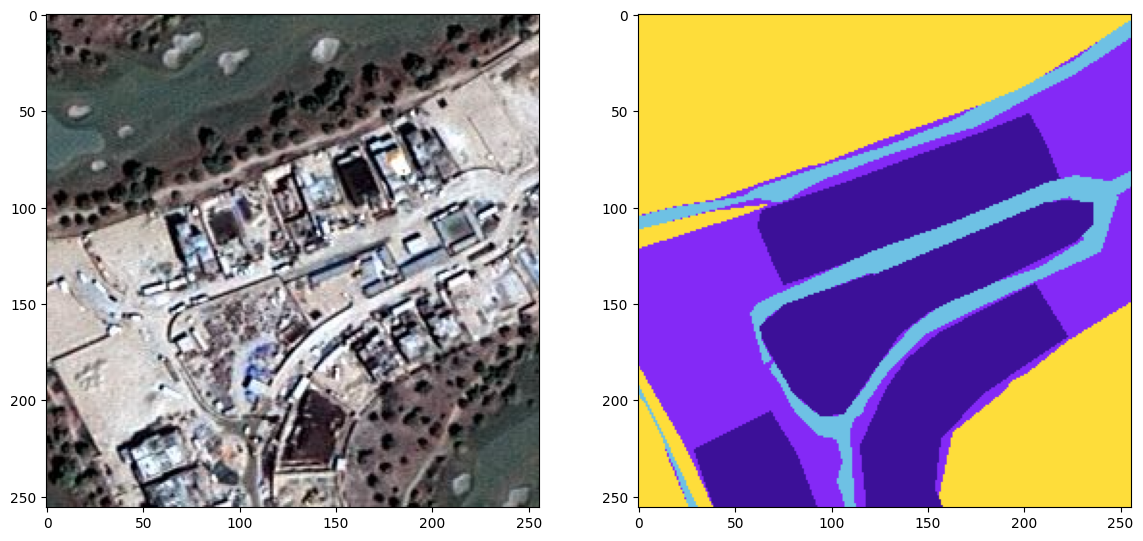

In [ ]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])



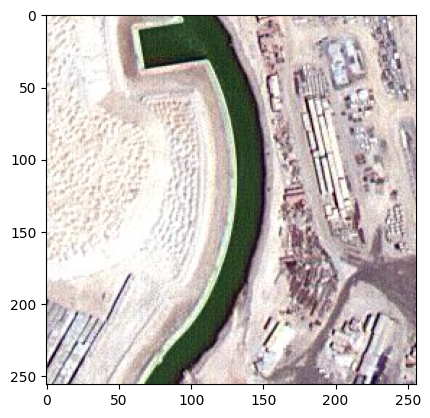

In [ ]:
plt.imshow(image_dataset[0])

## Mask Label Processing

In [ ]:
class_building = '#3C1098'
class_building =  class_building.lstrip('#')
#split into 3 segments
#3C 10 98

class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

[ 60  16 152]


In [ ]:
class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

[132  41 246]


In [ ]:
class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

[110 193 228]


In [ ]:
class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4)))
print(class_vegetation)

[254 221  58]


In [ ]:
class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

[226 169  41]


In [ ]:
class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[155 155 155]


## Labelling Masked Dataset

In [ ]:
#method convert rgb value to 2d label as these are masked value
label =  individual_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)



In [ ]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [ ]:
print("Total unique labels based on masks: ",format(np.unique(labels)))


Total unique labels based on masks:  [0 1 2 3 4 5]


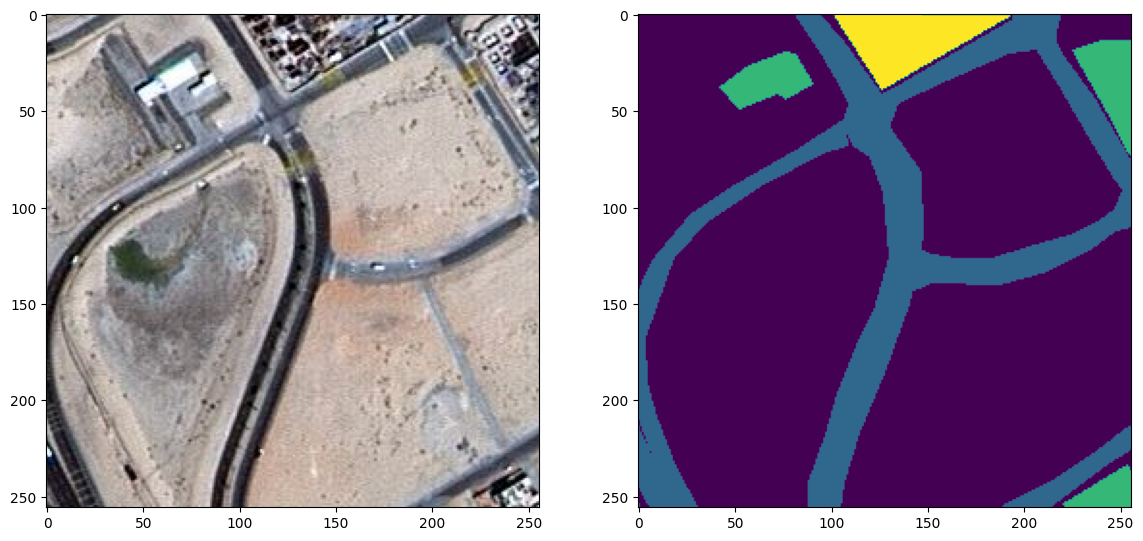

In [ ]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [ ]:
total_classes = len(np.unique(labels))

In [ ]:
total_classes

6

##Splitting Dataset

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [ ]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [ ]:
master_training_dataset = image_dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [ ]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


##Unet Implementation


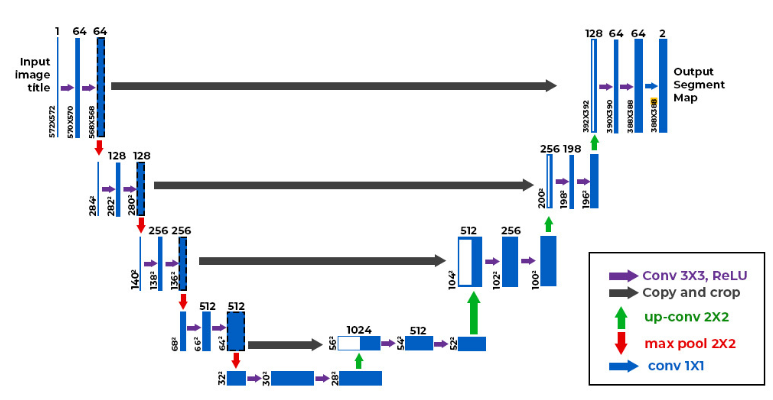## Unet Implementation

The architecture of U-Net is unique in that it consists of a contracting path and an expansive path. The contracting path contains encoder layers that capture contextual information and reduce the spatial resolution of the input, while the expansive path contains decoder layers that decode the encoded data and use the information from the contracting path via skip connections to generate a segmentation map.The contracting path in U-Net is responsible for identifying the relevant features in the input image. The encoder layers perform convolutional operations that reduce the spatial resolution of the feature maps while increasing their depth, thereby capturing increasingly abstract representations of the input.This contracting path is similar to the feedforward layers in other convolutional neural networks. On the other hand, the expansive path works on decoding the encoded data and locating the features while maintaining the spatial resolution of the input. The decoder layers in the expansive path upsample the feature maps, while also performing convolutional operations. The skip connections from the contracting path help to preserve the spatial information lost in the contracting path, which helps the decoder layers to locate the features more accurately.

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda


In [ ]:
from keras import backend as K


In [ ]:
#keras is high level model building library and here backend there is tensorflow
#keras gives skeleton and when it comes to process tensor we need backend

from keras import backend as K

###Evaluation Metric: Jaccard Index

The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets:
IoU(Intersection over Union) =  Overlap/Union

In [ ]:
# excellent results if overlap area is similar to union area
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [ ]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [ ]:
metrics = ["accuracy", jaccard_coef]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model()

In [ ]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

##Model Compilation







In [ ]:
import tensorflow as tf


In [ ]:
tf.keras.backend.clear_session()


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=metrics)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
early_stopping_cb = EarlyStopping(patience=5,restore_best_weights=True)

In [ ]:
model_history = model.fit(X_train,y_train,
                          batch_size = 16,
                          verbose = 1,
                          epochs = 30,
                          callbacks =[early_stopping_cb],
                          validation_data = (X_test,y_test),
                          shuffle = False)

Epoch 1/30
51/51 [==============================] - 41s 394ms/step - loss: 0.3525 - accuracy: 0.5528 - jaccard_coef: 0.3514 - val_loss: 0.2743 - val_accuracy: 0.6566 - val_jaccard_coef: 0.4372
Epoch 2/30
51/51 [==============================] - 11s 216ms/step - loss: 0.2487 - accuracy: 0.6882 - jaccard_coef: 0.4823 - val_loss: 0.2300 - val_accuracy: 0.6857 - val_jaccard_coef: 0.4922
Epoch 3/30
51/51 [==============================] - 11s 220ms/step - loss: 0.2269 - accuracy: 0.7073 - jaccard_coef: 0.5010 - val_loss: 0.2182 - val_accuracy: 0.6930 - val_jaccard_coef: 0.4972
Epoch 4/30
51/51 [==============================] - 11s 222ms/step - loss: 0.2166 - accuracy: 0.7238 - jaccard_coef: 0.5143 - val_loss: 0.2160 - val_accuracy: 0.6941 - val_jaccard_coef: 0.5075
Epoch 5/30
51/51 [==============================] - 11s 222ms/step - loss: 0.2079 - accuracy: 0.7362 - jaccard_coef: 0.5315 - val_loss: 0.2145 - val_accuracy: 0.7039 - val_jaccard_coef: 0.5162
Epoch 6/30
51/51 [=================

In [ ]:
history_a = model_history

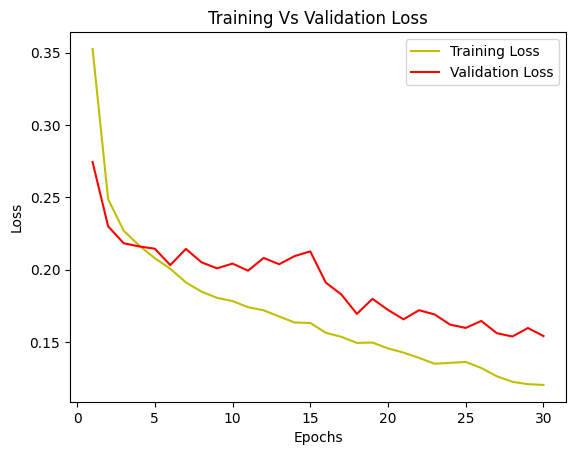

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss , 'y', label = "Training Loss")
plt.plot(epochs, val_loss , 'r', label = "Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

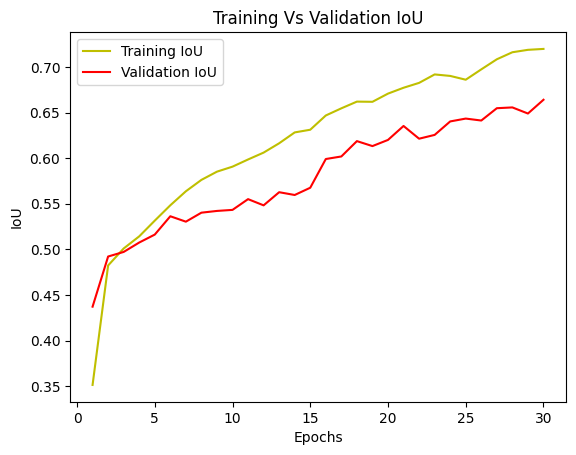

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef= history_a.history['val_jaccard_coef']
epochs = range(1,len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef , 'y', label = "Training IoU")
plt.plot(epochs, val_jaccard_coef , 'r', label = "Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("IoU")
plt.legend()
plt.show()

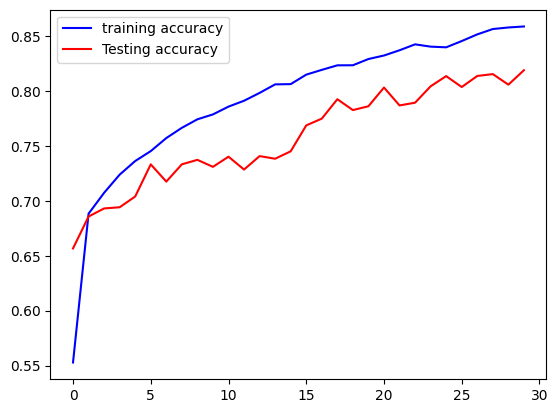

In [ ]:
plt.plot(history_a.history['accuracy'],color='blue',label='training accuracy')
plt.plot(history_a.history['val_accuracy'],color='red',label='Testing accuracy')
plt.legend()
plt.show()

In [ ]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 51}

In [ ]:
y_pred = model.predict(X_test)

5/5 [==============================] - 5s 60ms/step


In [ ]:
len(y_pred)

142

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis = 3)

In [ ]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 2],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 0, 0, 4],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [1, 4, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 4, 4],
        [1, 1, 1, ..., 0, 1, 1],
        [1, 1, 1, ..., 0, 4, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test_argmax = np.argmax(y_test, axis = 3)

In [ ]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Comparing Prediction results

In [ ]:
import random

In [ ]:
test_image_number = random.randint(0,len(X_test))

test_image  = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image,0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis =3)
prediction_image = predicted_image[0,:,:]

1/1 [==============================] - 1s 1s/step


In [ ]:
prediction_image

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

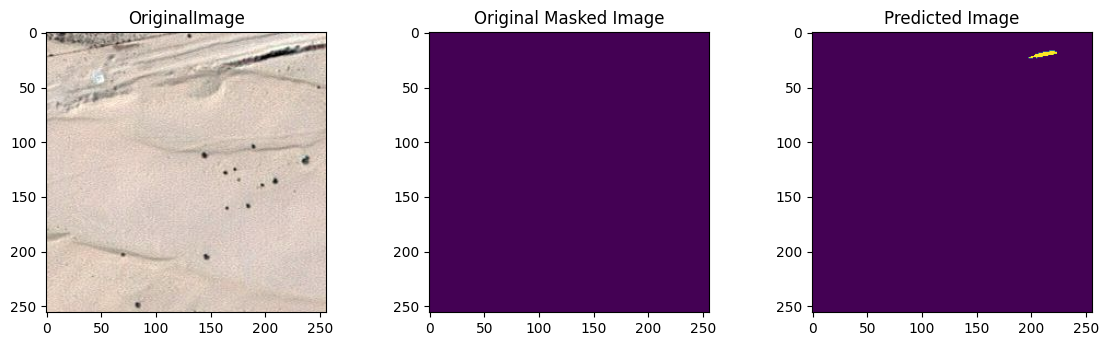

In [ ]:
plt.figure(figsize = (14,8))
plt.subplot(231)
plt.title("OriginalImage")
plt.imshow(test_image)

plt.subplot(232)
plt.title("Original Masked Image")
plt.imshow(ground_truth_image)

plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(prediction_image)

In [ ]:
model.save('Satellite_Segementation_full.h5 ')

In [ ]:
!ls -lah

total 24K
drwxr-xr-x 1 root root 4.0K Apr 25 07:39  .
drwxr-xr-x 1 root root 4.0K Apr 25 07:23  ..
drwxr-xr-x 4 root root 4.0K Apr 23 13:22  .config
drwx------ 5 root root 4.0K Apr 25 07:23  drive
drwxr-xr-x 1 root root 4.0K Apr 23 13:23  sample_data
drwxr-xr-x 4 root root 4.0K Apr 25 07:39 'Satellite_Segementation_full.h5 '
